### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

plt.style.use('dark_background')
pd.set_option('display.max_columns', 32)

### Load Dataset

In [3]:
breast_cancer = load_breast_cancer()

print('Features name:', breast_cancer.feature_names)
print('Target:', breast_cancer.target_names)
print('Dataset size:', breast_cancer.data.shape)

Features name: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target: ['malignant' 'benign']
Dataset size: (569, 30)


In [10]:
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['Target'] = breast_cancer.target
breast_cancer_df['Target'] = ['Malignant' if type==0 else 'Benign' for type in breast_cancer_df['Target']]
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [11]:
breast_cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Benign


### Data Visualization

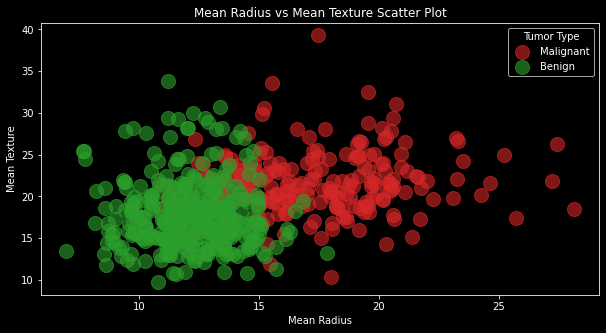

In [17]:
with plt.style.context('dark_background'):
    color = {'Malignant':'tab:red', 'Benign':'tab:green'}
    plt.figure(figsize=(10,5))
    for tumor_type in breast_cancer_df['Target'].unique():
        plt.scatter(breast_cancer_df[breast_cancer_df['Target']==tumor_type]['mean radius'],
                   breast_cancer_df[breast_cancer_df['Target']==tumor_type]['mean texture'],
                   c=color[tumor_type],
                   s=200,
                   alpha=0.6,
                   label=tumor_type,
                   )
        
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.title('Mean Radius vs Mean Texture Scatter Plot')
    plt.legend(title='Tumor Type', loc='best')

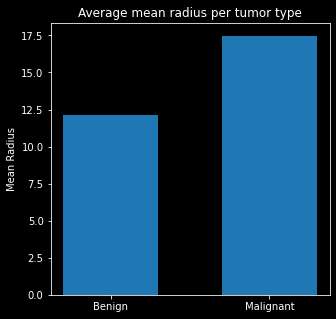

In [19]:
with plt.style.context('dark_background'):
    avg_radius_per_tumor_type = breast_cancer_df.groupby(by='Target').mean()[['mean radius']]
    
    plt.figure(figsize=(5,5))
    plt.bar(avg_radius_per_tumor_type.index,
            avg_radius_per_tumor_type['mean radius'],
            color='tab:blue',
            width=0.6
           )
    plt.ylabel('Mean Radius')
    plt.title('Average mean radius per tumor type')

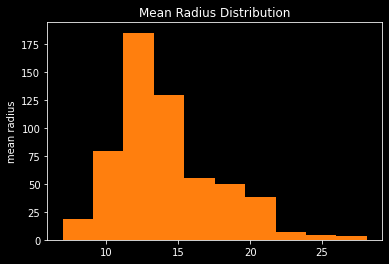

In [20]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6,4))
    plt.hist(breast_cancer_df['mean radius'], color='tab:orange')
    plt.ylabel('mean radius')
    plt.title('Mean Radius Distribution')

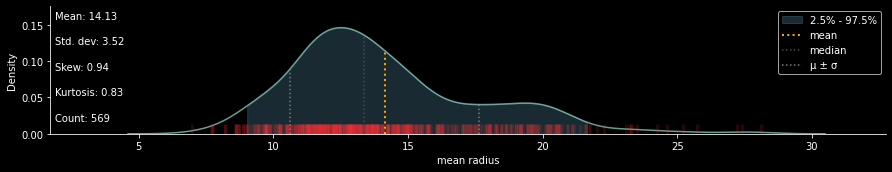

In [22]:
import klib

klib.dist_plot(breast_cancer_df['mean radius'], font_kws={"color": "#ffffff","alpha": 1})
plt.show()

In [41]:
import matplotlib.gridspec as gridspec

def create_figure(plot1_f1, plot1_f2, plot2_f, plot3_f):
    with plt.style.context('dark_background'):
        fig = plt.figure(constrained_layout=True, figsize=(10,8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
        
        ax1 = fig.add_subplot(specs[0, :])
        ax2 = fig.add_subplot(specs[1, 0])
        ax3 = fig.add_subplot(specs[1, 1])
        
        color = {'Malignant':'tab:red', 'Benign':'tab:green'}
        for tumor_type in breast_cancer_df['Target'].unique():
            ax1.scatter(breast_cancer_df[breast_cancer_df['Target']==tumor_type][plot1_f1],
                        breast_cancer_df[breast_cancer_df['Target']==tumor_type][plot1_f2],
                        c=color[tumor_type],
                        s=200,
                        alpha=0.6,
                        label=tumor_type,
                       )
            
        ax1.set_xlabel(plot1_f1)
        ax1.set_ylabel(plot1_f2)
        ax1.set_title('{} vs {} Scatter Plot'.format(plot1_f1, plot1_f2))
        ax1.legend(title='Tumor Type', loc='best')
        
        avg_radius_per_tumor_type = breast_cancer_df.groupby(by='Target').mean()[[plot2_f]]
        ax2.bar(avg_radius_per_tumor_type.index,
                avg_radius_per_tumor_type[plot2_f],
                color='tab:blue',
                width=0.6,
               )
        ax2.set_ylabel(plot2_f)
        ax2.set_title('Average {} per tumor type'.format(plot2_f))
        
        ax3.hist(breast_cancer_df[plot3_f], color='tab:orange')
        ax3.set_ylabel(plot3_f)
        ax3.set_title('{} distribution'.format(plot3_f))
        
        plt.close(fig)
        return fig

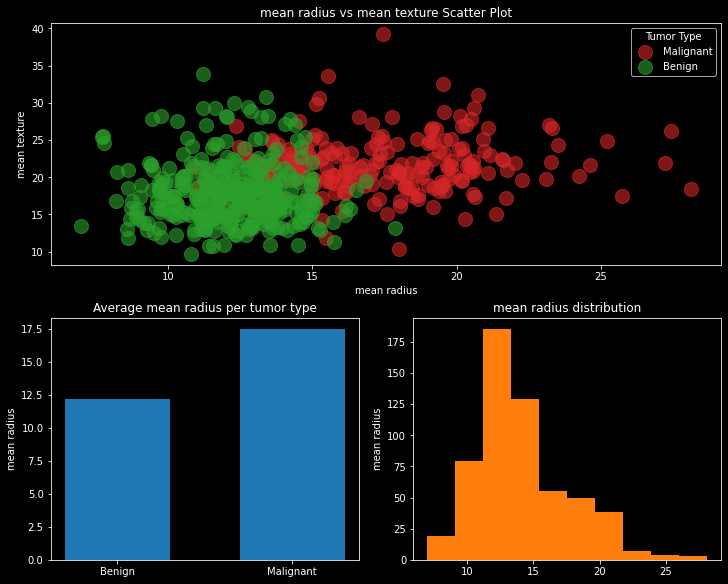

In [42]:
create_figure('mean radius', 'mean texture', 'mean radius', 'mean radius')

### Creating the dashboard

Column
    [0] Column
        [0] DiscreteSlider(name='plot1_f1', options=['mean radius', ...], value='mean radius')
        [1] DiscreteSlider(name='plot1_f2', options=['mean radius', ...], value='mean radius')
        [2] DiscreteSlider(name='plot2_f', options=['mean radius', ...], value='mean radius')
        [3] DiscreteSlider(name='plot3_f', options=['mean radius', ...], value='mean radius')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00240')
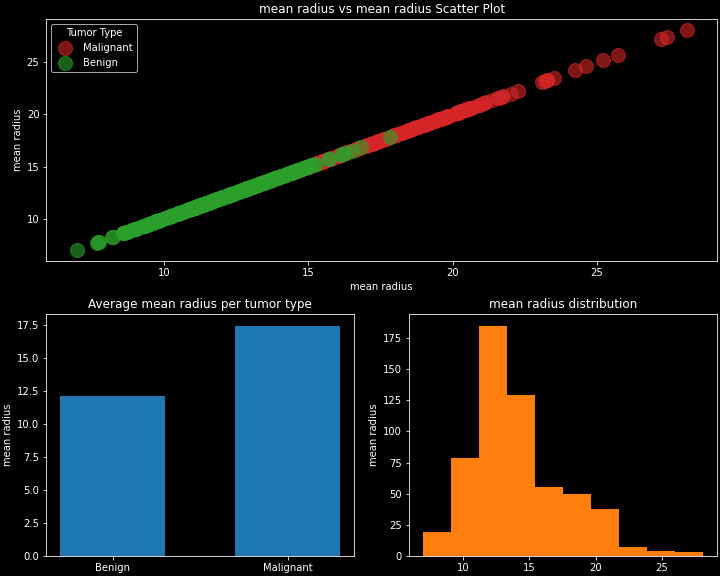

In [43]:
import panel as pn
pn.extension()

kw = dict(plot1_f1=breast_cancer.feature_names,
          plot1_f2=breast_cancer.feature_names,
          plot2_f=breast_cancer.feature_names,
          plot3_f=breast_cancer.feature_names,
         )

dash1 = pn.interact(create_figure, **kw)
dash1

Column
    [0] Row(align='center')
        [0] DiscreteSlider(name='plot1_f1', options=['mean radius', ...], value='mean radius')
        [1] DiscreteSlider(name='plot1_f2', options=['mean radius', ...], value='mean radius')
    [1] Row(align='center')
        [0] DiscreteSlider(name='plot2_f', options=['mean radius', ...], value='mean radius')
        [1] DiscreteSlider(name='plot3_f', options=['mean radius', ...], value='mean radius')
    [2] Row
        [0] Matplotlib(Figure, name='interactive00240')
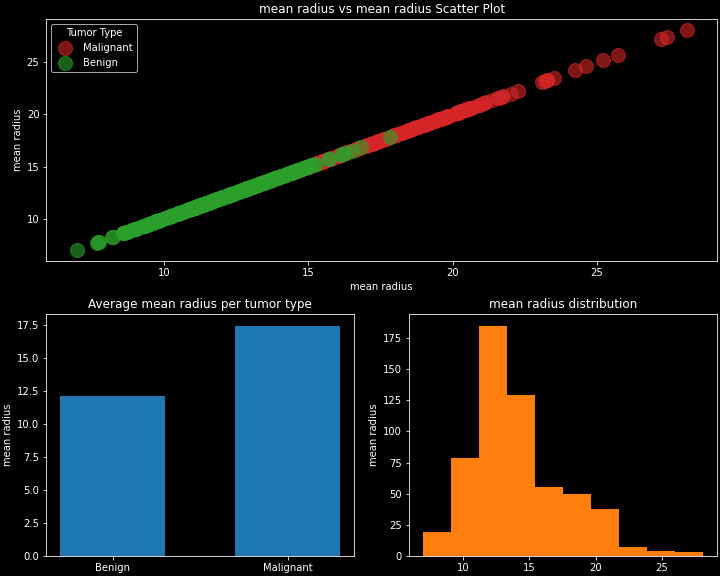

In [44]:
dash2 = pn.Column(
                    pn.Row(dash1[0][0], dash1[0][1], align='center'),
                    pn.Row(dash1[0][2], dash1[0][3], align='center'),
                    dash1[1]
                 )
dash2

### More Interactive Dashboard with Dropdown

In [46]:
import panel.widgets as pnw

f1 = pnw.Select(options=list(breast_cancer.feature_names), name='Scatter Plot Feature 1')
f2 = pnw.Select(options=list(breast_cancer.feature_names), name='Scatter Plot Feature 2')
f3 = pnw.Select(options=list(breast_cancer.feature_names), name='Bar Chart Feature')
f4 = pnw.Select(options=list(breast_cancer.feature_names), name='Histogram Feature')

In [47]:
@pn.depends(f1.param.value, f2.param.value, f3.param.value, f4.param.value)
def create_dash(f1,f2,f3,f4):
    return create_figure(f1,f2,f3,f4)

Column
    [0] StaticText(align='center', value='<h3>Breast Cancer D...)
    [1] Row(align='center')
        [0] Select(name='Scatter Plot Feature 1', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Scatter Plot Feature 2', options=['mean radius', ...], value='mean radius')
    [2] Row(align='center')
        [0] Select(name='Bar Chart Feature', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Histogram Feature', options=['mean radius', ...], value='mean radius')
    [3] Row
        [0] ParamFunction(function)
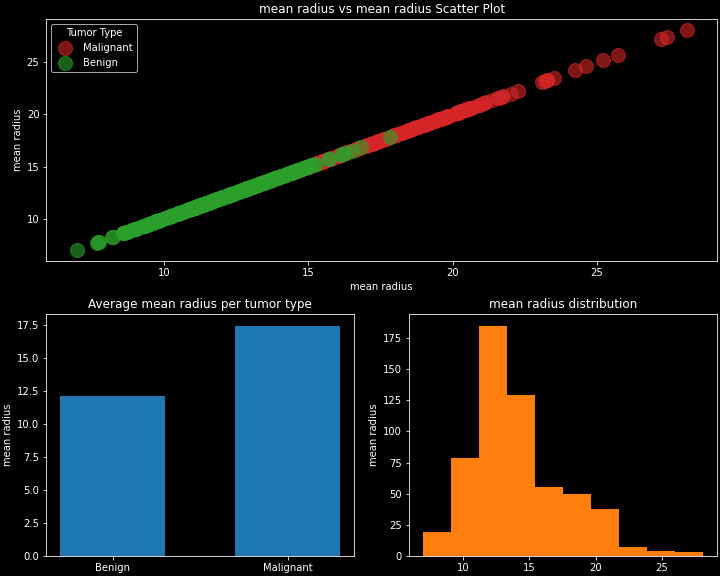

In [49]:
heading = '<h3>Breast Cancer Data Analysis Dashboard</h3>\nPlease feel free to try various combinations of parameters'
text = pnw.StaticText(value=heading, align='center')

dash3 = pn.Column(
                    text,
                    pn.Row(f1, f2, align='center'),
                    pn.Row(f3, f4, align='center'),
                    pn.Row(create_dash)
                 )
dash3

### Save the dashboard

Column
    [0] StaticText(align='center', value='<h3>Breast Cancer D...)
    [1] Row(align='center')
        [0] Select(name='Scatter Plot Feature 1', options=['mean radius', ...], value='mean concave points')
        [1] Select(name='Scatter Plot Feature 2', options=['mean radius', ...], value='mean radius')
    [2] Row(align='center')
        [0] Select(name='Bar Chart Feature', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Histogram Feature', options=['mean radius', ...], value='mean radius')
    [3] Row
        [0] ParamFunction(function)
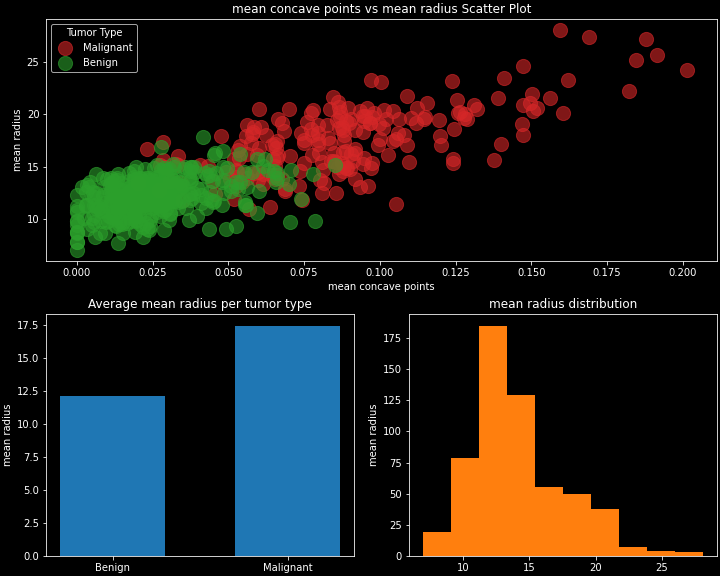

In [50]:
dash3.servable()

In [51]:
dash3.save('dash.html')